In [ ]:
#LIBRERIAS BASICAS

from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

In [ ]:
# FUNCIONES PARA CLUSTERING

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb   
    
def centroides(a,b):
    res = pd.DataFrame(data=b)
    i=0
    for x in a.columns:
        res.rename(columns={i:x},inplace=True)
        i = i+1
    res.reset_index(inplace=True)
    res.rename(columns={'index':'cluster'},inplace=True)
    return res 
    
def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X):
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        k_means = KMeans(n_clusters=k)
        model = k_means.fit(X)
        sum_of_squared_distances.append(k_means.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    plt.show()
    return sum_of_squared_distances

def silhouette(X):
    sil = []
    K = range(2, 15)
    for k in K:
      kmeans = KMeans(n_clusters = k).fit(X)
      labels = kmeans.labels_
      sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(K, sil, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('silhouette method for optimal k')
    plt.show()
    return sil

In [27]:
#DATA LOADING & PREVIEW

url = 'https://raw.githubusercontent.com/FiorellaChihuala/Data_Mining/main/examen_clustering_Clean2.csv'
##df = pd.read_csv(url,sep=';')
df = pd.read_csv(url,sep=',', encoding='latin-1')
df.head()



,CustomerID,Frequency,Monetary_value,Average_price,Recency,Country
0,12347,7,44.048571,1.741523,2,Other
1,12348,1,201.360000,0.524375,358,Other
2,12349,1,178.570000,3.799362,18,Other
3,12350,1,25.200000,2.100000,310,Other
4,12352,5,37.130000,4.722286,80,Other


In [28]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

X = df.drop(columns='CustomerID')
X = pd.get_dummies(X)               #ONE HOT ENCODING SI HAY CATEGORICAS
X = normalize(X)

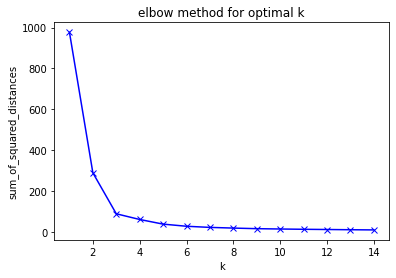

[977.1897021688285, 288.74885503803, 88.02637267835684, 60.18173263265723, 37.443966371152044, 26.931809644039703, 21.427373660059107, 18.034604902379968, 15.156654826849998, 13.515550595795268, 12.115147676471894, 11.05586018803091, 9.94648657075138, 9.04491644957443]


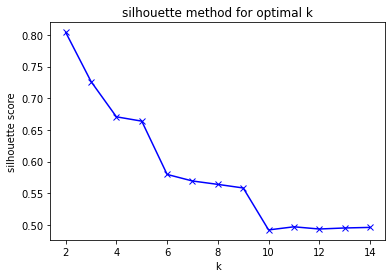

[0.804079776985406, 0.726379631980702, 0.6707065242474576, 0.6638816858511116, 0.5798390327852314, 0.5694923733113461, 0.5641384740170576, 0.5584637772562596, 0.4923258131823636, 0.4972357363256523, 0.4937550901052158, 0.4953866169176972, 0.49628977011512365]


In [29]:
# OPTIMAL NUMBER "K" OF CLUSTERS

print(elbow(X))
print(silhouette(X))

In [30]:
# ALGORITHM FIT

kmeans = KMeans(n_clusters=4, random_state=44).fit(X)

In [31]:
# CLUSTER CENTROIDS   ### SE PUEDE OBVIAR

print('Centroides optimos de clusteres')
print(centroides(X,kmeans.cluster_centers_))

Centroides optimos de clusteres
   cluster  Frequency  ...  Country_Other  Country_United Kingdom
0        0   0.019860  ...   5.037637e-15            1.000000e+00
1        1   0.001569  ...  -8.604228e-16            1.000000e+00
2        2   0.016676  ...   1.000000e+00           -7.660539e-15
3        3   0.005961  ...  -9.575674e-16            1.000000e+00

[4 rows x 7 columns]


In [32]:
# CLUSTER RESULTS    ### SE PUEDE OBVIAR

print('Asignacion de clusteres segun cada observacion')
print(clusteres(df,kmeans.labels_).head())

Asignacion de clusteres segun cada observacion
   CustomerID  Frequency  Monetary_value  ...  Recency  Country cluster
0       12347          7       44.048571  ...        2    Other       2
1       12348          1      201.360000  ...      358    Other       2
2       12349          1      178.570000  ...       18    Other       2
3       12350          1       25.200000  ...      310    Other       2
4       12352          5       37.130000  ...       80    Other       2

[5 rows x 7 columns]


In [36]:
# EXPORT RESULTS
centroides(X,kmeans.cluster_centers_).to_csv('centroidesKmeans.csv') 
files.download('centroidesKmeans.csv')

clusteres(df,kmeans.labels_).to_csv('resultadosKmeans.csv') 
files.download('resultadosKmeans.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")
